# 1. Linear Regression
### 공부 시간에 따른 시험 점수 

!pip3.9 install matplotlib

!pip3.9 install pandas

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [9]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [13]:
X = dataset.iloc[:,:-1].values #처음부터 마지막 컬럼 직전까지의 데이터 (독릭변수))
y = dataset.iloc[:, -1].values

In [14]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [17]:
y_pred = reg.predict(X) # X 에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

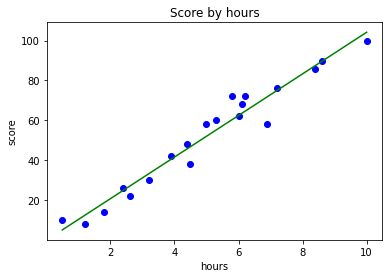

In [19]:
plt.scatter(X, y, color='blue') #산점도
plt.plot(X, y_pred, color='green') # linear graph
plt.title("Score by hours")
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [21]:
print('score when 9 hours of study', reg.predict([[9], [8], [7]]))

score when 9 hours of study [93.77478776 83.33109082 72.88739388]


In [22]:
reg.coef_ # 기울기(M)

array([10.44369694])

In [23]:
reg.intercept_ # y 절편

-0.218484702867201

y = mx + b  ->  y = 10.4436x - 0.2184 = 93.7748

### 데이터 세트 분리

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("LinearRegressionData.csv")
dataset

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [6]:
X = dataset.iloc[:, :-1].values # 독립변수
y = dataset.iloc[:, -1].values # 종속변수

In [7]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 실제 사용할때
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # for study traing 80 : test 20

In [9]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [10]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [14]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [11]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]),
 20)

In [12]:
y_test, len(y_test)

(array([ 90,   8, 100,  38]), 4)

In [13]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]), 16)

### 분리된 데이터를 통한 모델링

In [16]:
from sklearn.linear_model import LinearRegression
reg =  LinearRegression()

In [17]:
reg.fit(X_train, y_train) # 훈련세트로 학습

LinearRegression()

### 데이터 시각화 (훈련 세트)

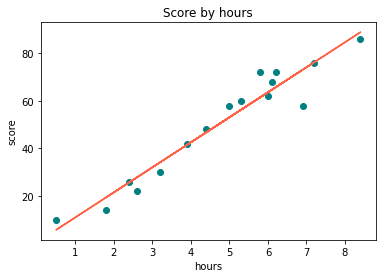

In [18]:
plt.scatter(X_train, y_train, color='teal')
plt.plot(X_train, reg.predict(X_train), color='tomato')
plt.title("Score by hours (train data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

### 데이터 시각화 (테스트 세트)

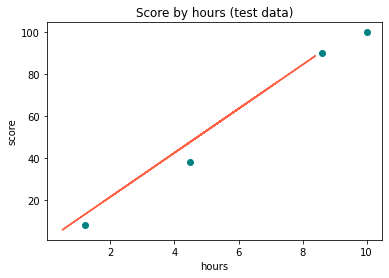

In [20]:
plt.scatter(X_test, y_test, color='teal')
plt.plot(X_train, reg.predict(X_train), color='tomato') #  X train으로 
plt.title("Score by hours (test data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [21]:
reg.coef_

array([10.49161294])

In [22]:
reg.intercept_

0.6115562905169796

### 모델 평가

In [23]:
reg.score(X_test, y_test)  # 테스트 세트를 통한 모델 평가

0.9727616474310156

In [25]:
reg.score(X_train, y_train)

0.9356663661221668

## 경사 하강법 (Gradient Descent)

max_iter: 훈련세트 반복 횟수(epoch 횟수)
eta0 : 학습률(learning rate)


지수 표기법
1e-3 = 0.001 (10^-3)
1e+4 = 10000 (10^4)

In [98]:
from sklearn.linear_model import SGDRegressor # SGD: Stochastic Gradient Descent 확률적 경사 하강법
# sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=0, verbose=1)  # max_iter : 몇번 반복 , eta0 = 0.001(default) 학습율, random_state=0, 공부할때보는 동영상이랑 값맞추기위해서, verbose=1 : 훈련세트를 반복하면서 손실이 어떻게 줄어듣는지 보기위해
# sr = SGDRegressor(max_iter=10000, eta0=0.001, verbose=1)  # max_iter : 몇번 반복 , eta0 = 0.001(default) 학습율
# sr = SGDRegressor(max_iter=100, eta0=1e-4, verbose=1)  # bad example : too few max_iter
sr = SGDRegressor() 
sr.fit(X_train, y_train)

SGDRegressor()

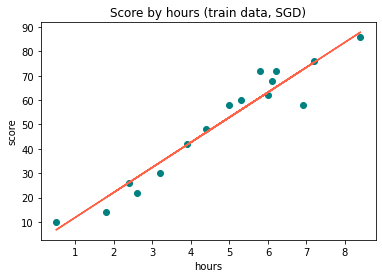

In [99]:
plt.scatter(X_train, y_train, color='teal')
plt.plot(X_train, sr.predict(X_train), color='tomato')
plt.title("Score by hours (train data, SGD)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [100]:
sr.coef_, sr.intercept_

(array([10.27646295]), array([1.56246749]))

In [101]:
sr.score(X_test, y_test)

0.9736738799550617

In [102]:
sr.score(X_train, y_train)

0.9352642925062952